## ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,837 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123589 files and dire

## ÌïÑÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.interpolate import make_interp_spline
import numpy as np

plt.rcParams['font.family'] = 'NanumBarunGothic'

## Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [ ]:
df = pd.read_csv('final_data.csv')
df['ÏÇ¨Í≥†Î∞úÏÉùÏùº'] = pd.to_datetime(df['ÏÇ¨Í≥†Î∞úÏÉùÏùº'], format='%Y-%m-%d')
df.head()

Íµ¨Î∂Ñ   ÌïôÍµêÍ∏â  ÏßÄÏó≠        ÍµêÏú°Ï≤≠ ÏÑ§Î¶ΩÏú†Ìòï ÏÇ¨Í≥†ÏûêÍµ¨Î∂Ñ ÏÇ¨Í≥†ÏûêÏÑ±Î≥Ñ ÏÇ¨Í≥†ÏûêÌïôÎÖÑ      ÏÇ¨Í≥†Î∞úÏÉùÏùº ÏÇ¨Í≥†Î∞úÏÉùÏöîÏùº  \
0  A0000209   Ï§ëÌïôÍµê  Í≤ΩÍ∏∞  ÏïàÏñëÍ≥ºÏ≤úÍµêÏú°ÏßÄÏõêÏ≤≠   Í≥µÎ¶Ω  ÏùºÎ∞òÌïôÏÉù     ÎÇ®   1ÌïôÎÖÑ 2019-01-02      Ïàò   
1  A0000261  Ï¥àÎì±ÌïôÍµê  Í≤ΩÍ∏∞  ÏïàÏñëÍ≥ºÏ≤úÍµêÏú°ÏßÄÏõêÏ≤≠   Í≥µÎ¶Ω  ÏùºÎ∞òÌïôÏÉù     ÎÇ®   2ÌïôÎÖÑ 2019-01-02      Ïàò   
2  A0000262   Ï§ëÌïôÍµê  Í≤ΩÍ∏∞    Î∂ÄÏ≤úÍµêÏú°ÏßÄÏõêÏ≤≠   Í≥µÎ¶Ω  ÏùºÎ∞òÌïôÏÉù     Ïó¨   1ÌïôÎÖÑ 2019-01-02      Ïàò   
3  A0000310  Ï¥àÎì±ÌïôÍµê  Í¥ëÏ£º    ÏÑúÎ∂ÄÍµêÏú°ÏßÄÏõêÏ≤≠   Í≥µÎ¶Ω  ÏùºÎ∞òÌïôÏÉù     Ïó¨   2ÌïôÎÖÑ 2019-01-02      Ïàò   
4  A0000316   Ï§ëÌïôÍµê  Ï∂©Î∂Å    Ï≤≠Ï£ºÍµêÏú°ÏßÄÏõêÏ≤≠   Í≥µÎ¶Ω  ÏùºÎ∞òÌïôÏÉù     ÎÇ®   2ÌïôÎÖÑ 2019-01-02      Ïàò   

  ÏÇ¨Í≥†Î∞úÏÉùÏãúÍ∞Å         ÏÇ¨Í≥†ÏãúÍ∞Ñ  ÏÇ¨Í≥†Ïû•ÏÜå    ÏÇ¨Í≥†Î∂ÄÏúÑ     ÏÇ¨Í≥†ÌòïÌÉú ÏÇ¨Í≥†ÎãπÏãúÌôúÎèô            ÏÇ¨Í≥†Îß§Í∞úÎ¨º  ÏÇ¨Í≥†Î∞úÏÉùÎÖÑÎèÑ  
0  09:00         ÏàòÏóÖÏãúÍ∞Ñ  Î∂ÄÏÜçÏãúÏÑ§      Îã§Î¶¨  ÎÇôÏÉÅ-ÎØ∏ÎÅÑÎü¨Ïßê   Í∏∞ÌÉÄÏö¥Îèô  Í±¥Î¨º(Î¨∏/Ï∞ΩÎ¨∏/Î∞îÎã•/Î≤Ω Îì±)    2019  
1  08:50          Îì±ÌïòÍµê    ÌÜµÎ°ú  ÏπòÏïÑ(Íµ¨Í∞ï)   ÎÇôÏÉÅ-ÎÑòÏñ¥Ïßê  Î≥¥Ìñâ/Ï£ºÌñâ  Í±¥Î¨º(Î¨∏/Ï∞ΩÎ¨∏/Î∞îÎã•/Î≤Ω Îì±)    2019  
2  10:20         Ï≤¥Ïú°ÏàòÏóÖ  Î∂ÄÏÜçÏãúÏÑ§       ÏÜê       Í∏∞ÌÉÄ   Íµ¨Í∏∞Ïö¥Îèô               Í∏∞ÌÉÄ    2019  
3  10:35  Ìú¥ÏãùÏãúÍ∞Ñ Î∞è Ï≤≠ÏÜåÏãúÍ∞Ñ   Ïö¥ÎèôÏû•  Î®∏Î¶¨(ÎëêÎ∂Ä)   ÎÇôÏÉÅ-ÎÑòÏñ¥Ïßê  Ïû•ÎÇú/ÎÜÄÏù¥   ÏûêÏó∞(ÏÇ¨Îûå/ÎèôÎ¨º/ÏãùÎ¨º Îì±)    2019  
4  09:10         Ï≤¥Ïú°ÏàòÏóÖ  Î∂ÄÏÜçÏãúÏÑ§       Î∞ú  ÎÇôÏÉÅ-ÎØ∏ÎÅÑÎü¨Ïßê  Î≥¥Ìñâ/Ï£ºÌñâ  Í±¥Î¨º(Î¨∏/Ï∞ΩÎ¨∏/Î∞îÎã•/Î≤Ω Îì±)    2019

## ÏßÄÏó≠Î≥Ñ ÏÇ¨Í≥† Î∞úÏÉù ÌòÑÌô©

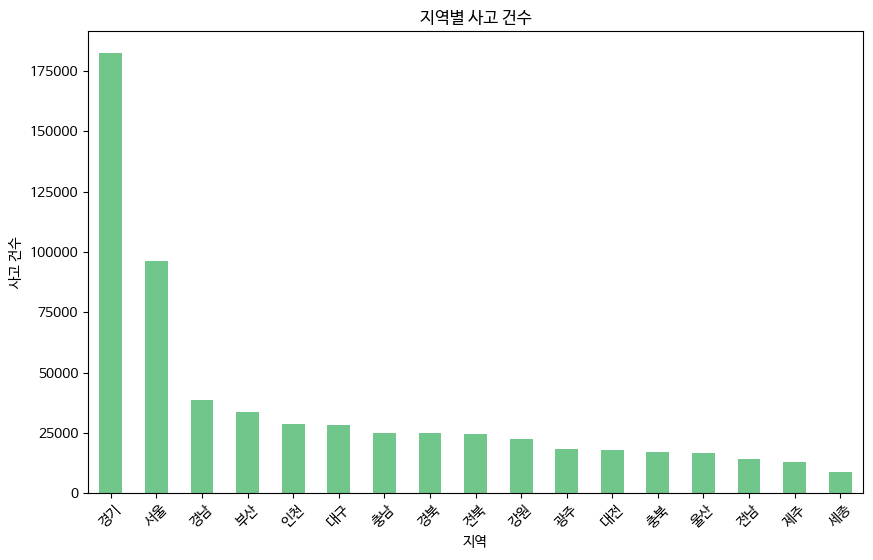

In [ ]:
region_counts = df['ÏßÄÏó≠'].value_counts()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar', color='#71C78B')
plt.title('ÏßÄÏó≠Î≥Ñ ÏÇ¨Í≥† Í±¥Ïàò')
plt.xlabel('ÏßÄÏó≠')
plt.ylabel('ÏÇ¨Í≥† Í±¥Ïàò')
plt.xticks(rotation=45)
plt.show()

## Ïó∞ÎèÑÎ≥Ñ ÏÇ¨Í≥† Î∞úÏÉù Í∑∏ÎûòÌîÑ

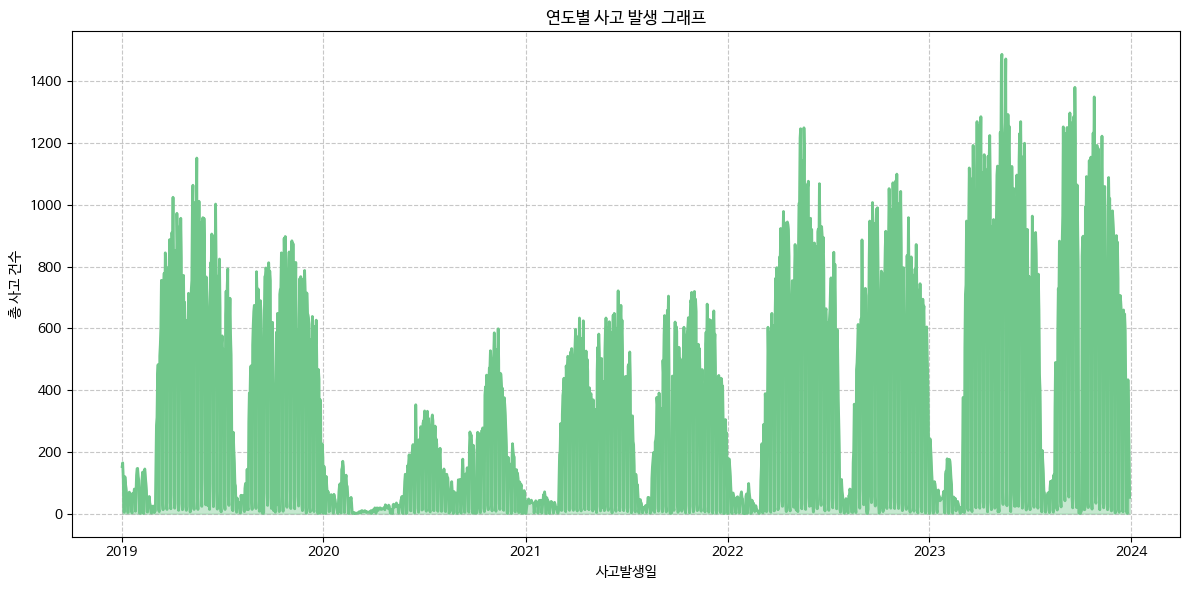

In [ ]:
# 'ÏÇ¨Í≥†Î∞úÏÉùÏùº' Ïª¨ÎüºÏùÑ datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['ÏÇ¨Í≥†Î∞úÏÉùÏùº'] = pd.to_datetime(df['ÏÇ¨Í≥†Î∞úÏÉùÏùº'])

# ÏùºÎ≥Ñ ÏÇ¨Í≥† Í±¥Ïàò ÏßëÍ≥Ñ
daily_counts = df['ÏÇ¨Í≥†Î∞úÏÉùÏùº'].value_counts().sort_index()

# ÏÑ† Ïä§ÌÉÄÏùºÏùò Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, color='#71C78B', linewidth=2)
plt.fill_between(daily_counts.index, daily_counts.values, color='#71C78B', alpha=0.4)
plt.title('Ïó∞ÎèÑÎ≥Ñ ÏÇ¨Í≥† Î∞úÏÉù Í∑∏ÎûòÌîÑ')
plt.xlabel('ÏÇ¨Í≥†Î∞úÏÉùÏùº')
plt.ylabel('Ï¥ù ÏÇ¨Í≥† Í±¥Ïàò')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## ÏïàÏ†ÑÍµêÏú° Î∂ÄÎã¥ Îã§Ï§ëÌöåÍ∑ÄÎ∂ÑÏÑù

### ÏÉÅÍ¥ÄÎ∂ÑÏÑù

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
data = {
    "ÏßÄÏó≠": ["Ï∂©Î∂Å", "Ï∂©ÎÇ®", "Ï†úÏ£º", "Ï†ÑÎ∂Å", "Ï†ÑÎÇ®", "Ïù∏Ï≤ú", "Ïö∏ÏÇ∞", "ÏÑ∏Ï¢Ö", "ÏÑúÏö∏", "Î∂ÄÏÇ∞", "ÎåÄÏ†Ñ", "ÎåÄÍµ¨", "Í¥ëÏ£º", "Í≤ΩÎ∂Å", "Í≤ΩÎÇ®", "Í≤ΩÍ∏∞", "Í∞ïÏõê"],
    "ÏÇ¨Í≥†Í±¥Ïàò": [4849, 6923, 3862, 6746, 3681, 8827, 5013, 2601, 30399, 10358, 4622, 8379, 5701, 7320, 12210, 60884, 5909],
    "7ÏÑ∏-21ÏÑ∏": [796824, 1139522, 377750, 904942, 871288, 1521322, 629550, 293052, 3832804, 1474900, 770312, 1210216, 835792, 1254966, 1789480, 7231910, 700296],
    "ÍµêÏõê1Ïù∏Îãπ ÏïàÏ†ÑÍµêÏú° Î∂ÄÎã¥": [0.06, 0.04, 0.17, 0.05, 0.05, 0.04, 0.10, 0.19, 0.01, 0.04, 0.06, 0.05, 0.07, 0.04, 0.03, 0.01, 0.06]
}

burden = pd.DataFrame(data)

# ÏÉÅÍ¥Ä Í≥ÑÏàò Í≥ÑÏÇ∞
correlation_matrix = burden[['ÏÇ¨Í≥†Í±¥Ïàò', '7ÏÑ∏-21ÏÑ∏', 'ÍµêÏõê1Ïù∏Îãπ ÏïàÏ†ÑÍµêÏú° Î∂ÄÎã¥']].corr()
print("ÏÉÅÍ¥Ä Í≥ÑÏàò ÌñâÎ†¨:\n", correlation_matrix)

ÏÉÅÍ¥Ä Í≥ÑÏàò ÌñâÎ†¨:
                    ÏÇ¨Í≥†Í±¥Ïàò    7ÏÑ∏-21ÏÑ∏  ÍµêÏõê1Ïù∏Îãπ ÏïàÏ†ÑÍµêÏú° Î∂ÄÎã¥
ÏÇ¨Í≥†Í±¥Ïàò           1.000000  0.995206      -0.475097
7ÏÑ∏-21ÏÑ∏         0.995206  1.000000      -0.538103
ÍµêÏõê1Ïù∏Îãπ ÏïàÏ†ÑÍµêÏú° Î∂ÄÎã¥ -0.475097 -0.538103       1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


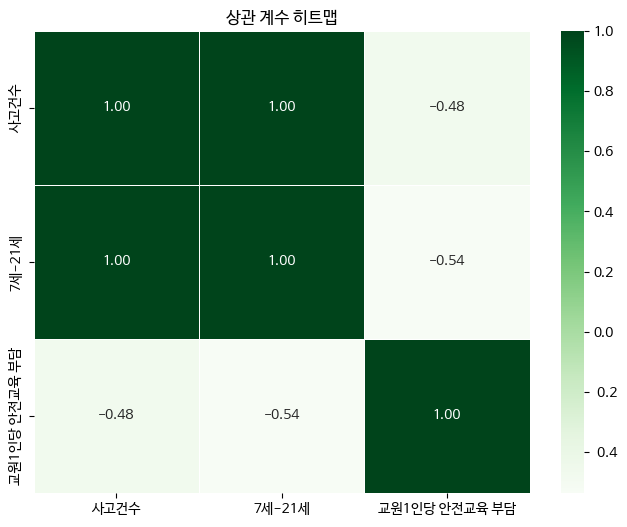

In [ ]:
# ÏÉÅÍ¥Ä Í≥ÑÏàò ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Greens', linewidths=.5)
plt.title('ÏÉÅÍ¥Ä Í≥ÑÏàò ÌûàÌä∏Îßµ')
plt.show()

### Îã§Ï§ëÌöåÍ∑ÄÎ∂ÑÏÑù

In [ ]:
from scipy.stats import pearsonr
import statsmodels.api as sm

# Ï¢ÖÏÜç Î≥ÄÏàòÏôÄ ÎèÖÎ¶Ω Î≥ÄÏàò ÏÑ§Ï†ï
X = burden[['7ÏÑ∏-21ÏÑ∏', 'ÍµêÏõê1Ïù∏Îãπ ÏïàÏ†ÑÍµêÏú° Î∂ÄÎã¥']]
y = burden['ÏÇ¨Í≥†Í±¥Ïàò']
X = sm.add_constant(X)  # ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä

# OLS ÌöåÍ∑Ä Î™®Îç∏ Íµ¨Ï∂ï
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   ÏÇ¨Í≥†Í±¥Ïàò   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1575.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           3.33e-17
Time:                        03:27:15   Log-Likelihood:                -140.18
No. Observations:                  17   AIC:                             286.4
Df Residuals:                      14   BIC:                             288.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3870.3697    630.692   

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


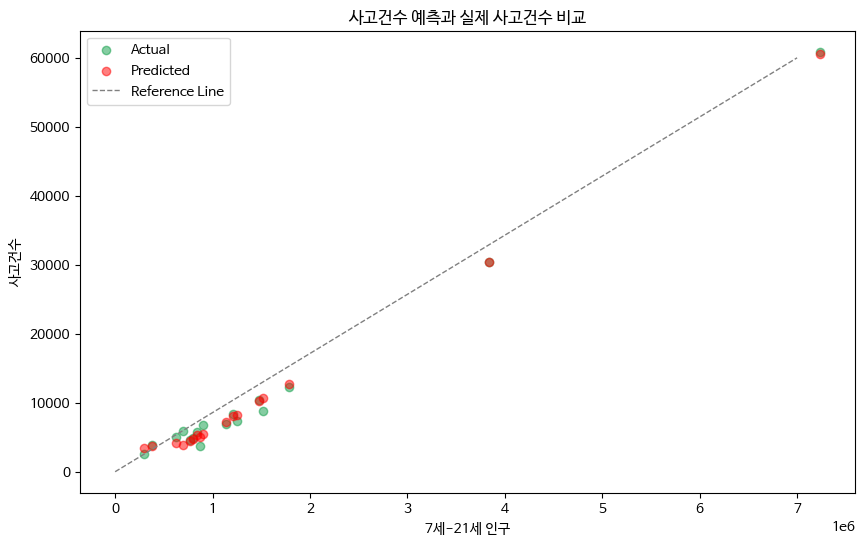

In [ ]:
# ÏòàÏ∏°Í∞í Í≥ÑÏÇ∞
predicted_values = model.predict(X)

# Ïã§Ï†ú Í∞íÍ≥º ÏòàÏ∏° Í∞íÏùò ÏÇ∞Ï†êÎèÑÎ°ú ÌëúÌòÑ
plt.figure(figsize=(10, 6))
plt.scatter(burden['7ÏÑ∏-21ÏÑ∏'], burden['ÏÇ¨Í≥†Í±¥Ïàò'], color='#0C9D46', label='Actual', alpha=0.5)  # Ïã§Ï†ú ÏÇ¨Í≥†Í±¥Ïàò
plt.scatter(burden['7ÏÑ∏-21ÏÑ∏'], predicted_values, color='red', label='Predicted', alpha=0.5)  # ÏòàÏ∏° ÏÇ¨Í≥†Í±¥Ïàò

# (0,0)Í≥º (7*10^6, 60000)ÏùÑ ÏßÄÎÇòÎäî ÌöåÏÉâ Ï†êÏÑ† Ï∂îÍ∞Ä
plt.plot([0, 7e6], [0, 60000], 'grey', linestyle='--', linewidth=1, label='Reference Line')

# Í∑∏ÎûòÌîÑ Ï†úÎ™©Í≥º Ï∂ï Ïù¥Î¶Ñ ÏÑ§Ï†ï
plt.title('ÏÇ¨Í≥†Í±¥Ïàò ÏòàÏ∏°Í≥º Ïã§Ï†ú ÏÇ¨Í≥†Í±¥Ïàò ÎπÑÍµê')
plt.xlabel('7ÏÑ∏-21ÏÑ∏ Ïù∏Íµ¨')
plt.ylabel('ÏÇ¨Í≥†Í±¥Ïàò')
plt.legend()
plt.show()

ÏÑ†Ïùò ÏùòÎØ∏:

    Í∏∞Ïö∏Í∏∞: Ïù¥ ÏÑ†Ïùò Í∏∞Ïö∏Í∏∞Îäî 7ÏÑ∏-21ÏÑ∏ Ïù∏Íµ¨ Ï¶ùÍ∞ÄÏóê Îî∞Î•∏ ÏÇ¨Í≥†Í±¥Ïàò Ï¶ùÍ∞ÄÏú®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. Í∏∞Ïö∏Í∏∞Í∞Ä Í∏âÌïòÎã§Îäî Í≤ÉÏùÄ Ïù∏Íµ¨Í∞Ä Ï¶ùÍ∞ÄÌï®Ïóê Îî∞Îùº ÏÇ¨Í≥†Í±¥ÏàòÍ∞Ä ÎπÑÎ°ÄÌïòÏó¨ ÌÅ¨Í≤å Ï¶ùÍ∞ÄÌï®ÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
    Ï†ÅÌï©ÎèÑ: ÏÑ†Ïù¥ Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Îì§Í≥º ÏñºÎßàÎÇò Ïûò ÎßûÎäîÏßÄ(Ï¶â, ÏñºÎßàÎÇò Í∞ÄÍπåÏù¥ ÏßÄÎÇòÍ∞ÄÎäîÏßÄ)Î•º Î≥¥Ïó¨Ï§çÎãàÎã§. Ïù¥Îäî Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º ÏñºÎßàÎÇò Ïûò ÏÑ§Î™ÖÌïòÍ≥† ÏòàÏ∏°ÌïòÎäîÏßÄÏùò Ï≤ôÎèÑÏûÖÎãàÎã§.

Î™®Îç∏ Ï†ÅÌï©ÎèÑ (Model Fit)

    R-squared (Í≤∞Ï†ï Í≥ÑÏàò): 0.996
        Ïù¥ Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞ Î≥ÄÎèôÏùò ÏïΩ 99.6%Î•º ÏÑ§Î™ÖÌïúÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. Îß§Ïö∞ ÎÜíÏùÄ ÏàòÏπòÎ°ú, Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º Ïûò ÏÑ§Î™ÖÌïòÍ≥† ÏûàÏùåÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.
    Adj. R-squared (Ï°∞Ï†ïÎêú Í≤∞Ï†ï Í≥ÑÏàò): 0.995
        ÎèÖÎ¶Ω Î≥ÄÏàòÏùò ÏàòÍ∞Ä ÎßéÏùÑ Îïå Í≥ºÏ†ÅÌï©ÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ Ï°∞Ï†ïÎêú R-squaredÏûÖÎãàÎã§. Ïù¥ Í∞íÎèÑ Îß§Ïö∞ ÎÜíÏïÑ Î™®Îç∏Ïùò Ï†ÅÌï©ÎèÑÍ∞Ä Ïö∞ÏàòÌï®ÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.
    F-statistic (F ÌÜµÍ≥ÑÎüâ): 1575
        Î™®Îç∏Ïù¥ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÎã§Îäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÇ¥Î©∞, Í¥ÄÎ†®Îêú p-valueÎäî 3.33e-17Î°ú Îß§Ïö∞ ÎÇÆÏïÑ Î™®Îç∏ Ï†ÑÏ≤¥Í∞Ä Ïú†ÏùòÎØ∏Ìï©ÎãàÎã§.

Í≥ÑÏàò (Coefficients)

    const (Ï†àÌé∏): -3870.3697
        Ï†àÌé∏Ïùò t-ÌÜµÍ≥ÑÎüâÏùÄ -6.137Ïù¥Î©∞, p-valueÍ∞Ä 0.000ÏúºÎ°ú Îß§Ïö∞ ÏûëÏïÑ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï©ÎãàÎã§. Ïù¥Îäî Î™®Îç∏Ïùò Ï†àÌé∏Ïù¥ 0Ïù¥ ÏïÑÎãòÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
    7ÏÑ∏-21ÏÑ∏: 0.0089
        Ïù¥ Í≥ÑÏàòÎäî 7ÏÑ∏-21ÏÑ∏ Ïù∏Íµ¨ Ï¶ùÍ∞Ä 1 Îã®ÏúÑÎãπ ÏÇ¨Í≥†Í±¥ÏàòÍ∞Ä ÌèâÍ∑†Ï†ÅÏúºÎ°ú 0.0089ÎßåÌÅº Ï¶ùÍ∞ÄÌï®ÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. t-ÌÜµÍ≥ÑÎüâÏùÄ 49.349Ïù¥Î©∞, p-valueÍ∞Ä 0.000ÏúºÎ°ú Ïù¥ Î≥ÄÏàòÍ∞Ä ÏÇ¨Í≥†Í±¥Ïàò ÏòàÏ∏°Ïóê Îß§Ïö∞ Ï§ëÏöîÌï®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.
    ÍµêÏõê 1Ïù∏Îãπ ÏïàÏ†ÑÍµêÏú° Î∂ÄÎã¥: 24,830
        Ïù¥ Î≥ÄÏàòÏùò Í≥ÑÏàòÎäî ÍµêÏú° Î∂ÄÎã¥ ÏßÄÏàòÍ∞Ä 1 Ï¶ùÍ∞ÄÌï† Îïå ÏÇ¨Í≥†Í±¥ÏàòÍ∞Ä ÌèâÍ∑†Ï†ÅÏúºÎ°ú 24,830ÎßåÌÅº Ï¶ùÍ∞ÄÌïúÎã§Îäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. t-ÌÜµÍ≥ÑÎüâÏùÄ 4.032Ïù¥Î©∞, p-valueÎäî 0.001Î°ú, Ïù¥ Î≥ÄÏàò Ïó≠Ïãú ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï©ÎãàÎã§.

ÏßÑÎã® ÌÜµÍ≥Ñ (Diagnostic Statistics)

    Durbin-Watson: 1.784
        Ïù¥ Í∞íÏùÄ ÏûîÏ∞®Îì§ ÏÇ¨Ïù¥Ïùò ÏûêÍ∏∞ÏÉÅÍ¥Ä(autocorrelation)ÏùÑ ÏßÑÎã®Ìï©ÎãàÎã§. 1.784Îäî ÏûêÍ∏∞ÏÉÅÍ¥ÄÏù¥ ÌÅ¨Í≤å Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏùåÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§ (2Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Ï¢ãÏùå).
    Omnibus, Prob(Omnibus), Jarque-Bera (JB), Prob(JB):
        Ïù¥ Í∞íÎì§ÏùÄ ÏûîÏ∞®Ïùò Ï†ïÍ∑úÏÑ±ÏùÑ Í≤ÄÏ†ïÌï©ÎãàÎã§. Îëê ÌÖåÏä§Ìä∏ Î™®Îëê p-valueÍ∞Ä ÎÜíÏïÑ(0.719, 0.974) ÏûîÏ∞®Í∞Ä Ï†ïÍ∑ú Î∂ÑÌè¨Î•º Îî∞Î•∏Îã§Îäî Í∑ºÍ±∞Í∞Ä ÏïΩÌï®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. Í∑∏Îü¨ÎÇò Î™®Îç∏Ïùò ÏÑ§Î™ÖÎ†•Ïù¥ Îß§Ïö∞ ÎÜíÏïÑ Ïù¥Îü¨Ìïú Î¨∏Ï†úÍ∞Ä ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄ ÏïäÏùÑ Ïàò ÏûàÏäµÎãàÎã§.

Ïù¥Îü¨Ìïú Í≤∞Í≥ºÎäî Î™®Îç∏Ïù¥ ÏÇ¨Í≥†Í±¥ÏàòÎ•º ÏòàÏ∏°ÌïòÎäî Îç∞ ÏûàÏñ¥ Îß§Ïö∞ Ïú†ÏùòÎØ∏ÌïòÎ©∞, Ï£ºÏöî Î≥ÄÏàòÎì§Ïù¥ ÏÇ¨Í≥†Í±¥ÏàòÏóê Í∞ïÎ†•Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÍ≥† ÏûàÏùåÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§. ÌäπÌûà 7ÏÑ∏-21ÏÑ∏ Ïù∏Íµ¨ÏôÄ ÍµêÏõê 1Ïù∏Îãπ ÏïàÏ†ÑÍµêÏú° Î∂ÄÎã¥ÏùÄ Í∞ïÎ†•Ìïú ÏòàÏ∏° ÏöîÏù∏ÏúºÎ°ú ÏûëÏö©ÌïòÍ≥† ÏûàÏäµÎãàÎã§.

üî¥üî¥Îã§Ï§ëÌöåÍ∑ÄÎ∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ:

    Î™®Îç∏ ÏÑ§Î™ÖÎ†•:
        R-squared Í∞íÏùÄ 0.996ÏúºÎ°ú, Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞ Î≥ÄÎèôÏùò Í±∞Ïùò Ï†ÑÏ≤¥Î•º ÏÑ§Î™ÖÌïòÍ≥† ÏûàÏùåÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. Ïù¥Îäî Îß§Ïö∞ ÎÜíÏùÄ ÏàòÏπòÎ°ú, ÎèÖÎ¶ΩÎ≥ÄÏàòÍ∞Ä Ï¢ÖÏÜçÎ≥ÄÏàòÏù∏ ÏÇ¨Í≥†Í±¥ÏàòÎ•º Îß§Ïö∞ Ïûò ÏòàÏ∏°ÌïòÍ≥† ÏûàÏùåÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.

        üî¥R-squared Í∞í(Î™®Îç∏ ÏÑ§Î™ÖÎ†•)ÏùÄ 0.996

    ÌöåÍ∑Ä Í≥ÑÏàò:
        7ÏÑ∏-21ÏÑ∏ Ïù∏Íµ¨Ïóê ÎåÄÌïú Í≥ÑÏàòÎäî 0.0089Î°ú, Ïù¥ Ïù∏Íµ¨Í∞Ä 1 Ï¶ùÍ∞ÄÌï† ÎïåÎßàÎã§ ÏÇ¨Í≥†Í±¥ÏàòÎäî ÏïΩ 0.0089ÎßåÌÅº Ï¶ùÍ∞ÄÌï©ÎãàÎã§. Ïù¥ Í≥ÑÏàòÎäî Îß§Ïö∞ Ïú†ÏùòÌïòÎ©∞(p-value < 0.000), Ïù∏Íµ¨ Ïàò Ï¶ùÍ∞ÄÍ∞Ä ÏÇ¨Í≥†Í±¥Ïàò Ï¶ùÍ∞ÄÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎÅºÏπòÍ≥† ÏûàÏùåÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.
        ÍµêÏõê 1Ïù∏Îãπ ÏïàÏ†ÑÍµêÏú° Î∂ÄÎã¥Ïóê ÎåÄÌïú Í≥ÑÏàòÎäî ÏïΩ 24,830ÏúºÎ°ú, Ïù¥ ÏßÄÌëúÍ∞Ä 1 Ï¶ùÍ∞ÄÌï† Îïå ÏÇ¨Í≥†Í±¥ÏàòÎäî ÌèâÍ∑†Ï†ÅÏúºÎ°ú 24,830ÎßåÌÅº Ï¶ùÍ∞ÄÌï©ÎãàÎã§. Ïù¥ Î≥ÄÏàò Ïó≠Ïãú ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï©ÎãàÎã§(p-value = 0.001), ÍµêÏú° Î∂ÄÎã¥Ïù¥ ÎÜíÏùÑÏàòÎ°ù ÏÇ¨Í≥†Í±¥ÏàòÍ∞Ä ÎÜíÏïÑÏßÄÎäî Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.

        üî¥7ÏÑ∏-21ÏÑ∏ Ïù∏Íµ¨Ïóê ÎåÄÌïú Í≥ÑÏàòÎäî 0.0089
        üî¥Ïù¥ Ïù∏Íµ¨Í∞Ä 1 Ï¶ùÍ∞ÄÌï† ÎïåÎßàÎã§ ÏÇ¨Í≥†Í±¥ÏàòÎäî ÏïΩ 0.0089ÎßåÌÅº Ï¶ùÍ∞Ä
        üî¥p-value < 0.000

        üî¥ÍµêÏõê 1Ïù∏Îãπ ÏïàÏ†ÑÍµêÏú° Î∂ÄÎã¥Ïóê ÎåÄÌïú Í≥ÑÏàòÎäî ÏïΩ 24,830
        üî¥Ïù¥ ÏßÄÌëúÍ∞Ä 1 Ï¶ùÍ∞ÄÌï† Îïå ÏÇ¨Í≥†Í±¥ÏàòÎäî ÌèâÍ∑†Ï†ÅÏúºÎ°ú 24,830ÎßåÌÅº Ï¶ùÍ∞Ä
        üî¥p-value = 0.001

    Î™®Îç∏Ïùò ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±:
        F-ÌÜµÍ≥ÑÎüâÏùÄ 1575Î°ú, Î™®Îç∏Ïù¥ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Îß§Ïö∞ Ïú†ÏùòÎØ∏ÌïòÎ©∞(p-value = 3.33e-17), ÏÇ¨Ïö©Îêú ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§Ïù¥ ÏÇ¨Í≥†Í±¥ÏàòÎ•º ÏòàÏ∏°ÌïòÎäî Îç∞ Ï†ÅÌï©Ìï®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.

        üî¥F-ÌÜµÍ≥ÑÎüâÏùÄ 1575
        üî¥p-value = 3.33e-17
        üî¥ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§Ïù¥ ÏÇ¨Í≥†Í±¥ÏàòÎ•º ÏòàÏ∏°ÌïòÎäî Îç∞ Ï†ÅÌï©Ìï®


Í∑∏ÎûòÌîÑ Î∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ:

    Í∑∏ÎûòÌîÑÏóêÏÑú ÌååÎûÄÏÉâ Ï†êÏùÄ Ïã§Ï†ú ÏÇ¨Í≥†Í±¥ÏàòÎ•º, Îπ®Í∞ÑÏÉâ Ï†êÏùÄ ÏòàÏ∏°Îêú ÏÇ¨Í≥†Í±¥ÏàòÎ•º ÎÇòÌÉÄÎÉÖÎãàÎã§. Í∑∏ÎûòÌîÑ ÏÉÅÏùò Îπ®Í∞ÑÏÉâ Ï†êÎì§ÏùÄ ÌååÎûÄÏÉâ Ï†êÎì§Í≥º Í±∞Ïùò ÏùºÏπòÌïòÎ©∞, Ïù¥Îäî ÌöåÍ∑Ä Î™®Îç∏Ïùò ÏòàÏ∏°Ïù¥ Ïã§Ï†ú Í∞íÍ≥º Îß§Ïö∞ Í∞ÄÍπùÎã§Îäî Í≤ÉÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.
    ÌöåÏÉâ Ï†êÏÑ†(Reference Line)ÏùÄ (0,0)ÏóêÏÑú (7,000,000, 60,000)ÍπåÏßÄÏùò Í∏∞Ï§ÄÏÑ†ÏùÑ ÎÇòÌÉÄÎÇ¥Î©∞, ÏùºÎ∞òÏ†ÅÏù∏ Ï∂îÏÑ∏ÏÑ†ÏúºÎ°ú ÏÇ¨Ïö©Îê† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥ ÏÑ†ÏùÄ ÌëúÏ§Ä Ï∂îÏÑ∏Î•º ÎÇòÌÉÄÎÇ¥ÏßÄÎßå Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Îì§ÏùÄ Ïù¥ ÏÑ†ÏóêÏÑú ÏïΩÍ∞Ñ Î≤óÏñ¥ÎÇú ÏúÑÏπòÏóê ÏûàÏäµÎãàÎã§.

Ï¢ÖÌï©Ï†Å Ìï¥ÏÑù:

    ÌöåÍ∑Ä Î∂ÑÏÑù Í≤∞Í≥ºÏôÄ Í∑∏ÎûòÌîÑÎ•º ÌÜµÌï¥, 7ÏÑ∏-21ÏÑ∏ Ïù∏Íµ¨ ÏàòÏôÄ ÍµêÏõê 1Ïù∏Îãπ ÏïàÏ†ÑÍµêÏú° Î∂ÄÎã¥Ïù¥ ÏÇ¨Í≥†Í±¥ÏàòÏóê Í∞ïÎ†•Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÍ≥† ÏûàÏúºÎ©∞, Ïù¥ Î™®Îç∏ÏùÄ Ïã§Ï†ú ÏÇ¨Í≥†Í±¥ÏàòÎ•º Îß§Ïö∞ Ï†ïÌôïÌïòÍ≤å ÏòàÏ∏°ÌïòÍ≥† ÏûàÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥ Ï†ïÎ≥¥Îäî Ï†ïÏ±Ö Í≤∞Ï†ïÍ≥º ÏÇ¨Í≥† ÏòàÎ∞© Ï†ÑÎûµ ÏàòÎ¶ΩÏóê Ïú†Ïö©ÌïòÍ≤å ÌôúÏö©Îê† Ïàò ÏûàÏäµÎãàÎã§.

    üî¥7ÏÑ∏-21ÏÑ∏ Ïù∏Íµ¨ ÏàòÏôÄ ÍµêÏõê 1Ïù∏Îãπ ÏïàÏ†ÑÍµêÏú° Î∂ÄÎã¥Ïù¥ ÏÇ¨Í≥†Í±¥ÏàòÏóê Í∞ïÎ†•Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§.
    üî¥Ïù¥ Î™®Îç∏ÏùÄ Ïã§Ï†ú ÏÇ¨Í≥†Í±¥ÏàòÎ•º Îß§Ïö∞ Ï†ïÌôïÌïòÍ≤å ÏòàÏ∏°